In [1]:
#https://medium.com/@edwardpie/building-a-cnn-for-recognising-mouse-drawn-digits-with-keras-opencv-mnist-72a7ae7a070a
#https://github.com/hackstock/deep-ocr/blob/master/app.py
#https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
from keras.datasets import mnist
import pandas as pd
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap="gray")
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
from keras import layers
from keras import models

network = models.Sequential()
network.add(layers.Dense(units=512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(units=512,activation="relu"))
network.add(layers.Dense(units=10,activation="softmax"))


In [18]:
network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [19]:
history = network.fit(train_images,train_labels,epochs=6,shuffle=True,batch_size=128)

Epoch 1/6
60000/60000 [==============================] - 7s 115us/step - loss: 0.2208 - accuracy: 0.9332
Epoch 2/6
60000/60000 [==============================] - 7s 113us/step - loss: 0.0818 - accuracy: 0.9751
Epoch 3/6
60000/60000 [==============================] - 7s 113us/step - loss: 0.0545 - accuracy: 0.9834
Epoch 4/6
60000/60000 [==============================] - 7s 114us/step - loss: 0.0401 - accuracy: 0.9873
Epoch 5/6
60000/60000 [==============================] - 7s 114us/step - loss: 0.0293 - accuracy: 0.9912
Epoch 6/6
60000/60000 [==============================] - 7s 114us/step - loss: 0.0226 - accuracy: 0.9929


In [20]:
test_loss,test_acc = network.evaluate(test_images,test_labels)
print(test_loss,test_acc)

10000/10000 [==============================] - 1s 68us/step
0.08558085544144815 0.9807000160217285


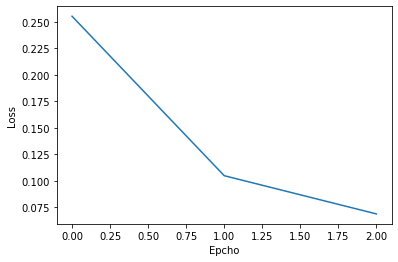

In [12]:
import matplotlib.pyplot as plt
plt.xlabel("Epcho")
plt.ylabel("Loss")
plt.plot(history.history['loss'])

In [ ]:
import cv2
import numpy as np
#from model import NeuralNet

#net = NeuralNet()

# creating a 600 x 600 pixels canvas for mouse drawing
canvas = np.ones((150,150), dtype="uint8") * 255
# designating a 400 x 400 pixels point of interest on which digits will be drawn
canvas[:,:] = 0

start_point = None
end_point = None
is_drawing = False

label = np.arange(0,10)

def draw_line(img,start_at,end_at):
    cv2.line(img,start_at,end_at,255,15)

def on_mouse_events(event,x,y,flags,params):
    global start_point
    global end_point
    global canvas
    global is_drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        if is_drawing:
            start_point = (x,y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            end_point = (x,y)
            draw_line(canvas,start_point,end_point)
            start_point = end_point
    elif event == cv2.EVENT_LBUTTONUP:
        is_drawing = False


cv2.namedWindow("Test Canvas")
cv2.setMouseCallback("Test Canvas", on_mouse_events)


while(True):
    cv2.imshow("Test Canvas", canvas)
    key = cv2.waitKey(1) & 0xFF 
    if key == ord('q'):
        break
    elif key == ord('s'):
        is_drawing = True
    elif key == ord('c'):
        canvas[:,:] = 0
    elif key == ord('p'):
        image = canvas[:,:]
        dimension = image.shape
        print(dimension)
        
        #image = cv2.resize(image,(28,28)).flatten()
        image = cv2.resize(image,(28,28))
        image = image.astype('float32') / 255
        
        dimension = image.shape
        print(dimension)
        
        g = image.reshape(1,(28*28))
        dimension = g.shape
        print(dimension)
        
        result = network.predict(g)
        #result = 0
        print("PREDICTION : ",result)
        index = result.argmax()
        print("VALUE :",label[index])

cv2.destroyAllWindows()  

(150, 150)
(28, 28)
(1, 784)
PREDICTION :  [[1.17769625e-35 1.26966037e-17 1.00000000e+00 2.95568403e-20
  0.00000000e+00 1.41669203e-36 0.00000000e+00 3.66314112e-22
  7.78269569e-30 0.00000000e+00]]
VALUE : 2
(150, 150)
(28, 28)
(1, 784)
PREDICTION :  [[0.0000000e+00 2.0915881e-28 1.0317471e-23 1.0000000e+00 0.0000000e+00
  5.1673561e-29 0.0000000e+00 6.3604260e-27 4.7986369e-24 5.2025284e-27]]
VALUE : 3
(150, 150)
(28, 28)
(1, 784)
PREDICTION :  [[3.1646102e-11 6.9773520e-08 8.8783512e-05 1.5273924e-15 1.7562227e-06
  9.9864209e-08 9.9990928e-01 2.9080406e-14 2.2423474e-10 2.9365019e-09]]
VALUE : 6
(150, 150)
(28, 28)
(1, 784)
PREDICTION :  [[4.24710934e-28 7.82521935e-23 5.68201222e-06 3.33947280e-14
  1.61480444e-26 1.99871239e-22 1.35813578e-36 9.99994278e-01
  4.89714248e-22 1.22237706e-20]]
VALUE : 7
(150, 150)
(28, 28)
(1, 784)
PREDICTION :  [[8.5074274e-11 1.3699895e-09 2.8859542e-03 9.7672302e-01 1.2774457e-07
  1.3667425e-13 9.7374695e-12 2.5754787e-07 2.0157101e-02 2.33564